# EXPLORATORY DATA ANALYSIS
##   All the Intermediate Colleges in Pakistan

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## 1: Load Data
 ### 'All the Intermediate Colleges in Pakistan.csv'
 This command loads the dataset into a DataFrame.

In [3]:
df = pd.read_csv('All the Intermediate Colleges in Pakistan.csv')


## 2: Initial Data Exploration
We explore the first few rows, get a summary of the dataset, and generate statistical summaries of numerical columns.

In [4]:
# Display first few rows
df.head(5)

,Name,Location,Study Program,Sector,Affiliation,Rating
0,Campus.pk Lahore,"Office 206, 2nd Floor Siddique Trade Center Ma...",FSc Pre Engineering Fsc Pre Medical,Private,ads,0*
1,Allama Iqbal Open University Aiou Islamabad,"Sector H-8, Islamabad-44000",FSc Pre Engineering ICs Computer Science FSc P...,Public,NaN,5*
2,Government College University Gcu Lahore,"GC University, Katchery Road Lahore 54000",FSc Pre Engineering ICS Computer Science FSc P...,Public,HEC,4*
3,Govt College University GCU Faisalabad,"Kotwali Rd, Faisalabad 38000",FSc Pre-Engineering ICS FSc Pre-Medical Icom F...,Public,HEC,3*
4,Lahore College For Women University (Lcwu) Lahore,"Near Wapda Flats, Jail Road, Lahore",FA Arts FSc Pre Engineering ICS Physics ICS St...,Public,NaN,5*


In [5]:
# Summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1630 entries, 0 to 1629
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Name           1630 non-null   object
 1   Location       1626 non-null   object
 2   Study Program  1630 non-null   object
 3   Sector         1101 non-null   object
 4   Affiliation    155 non-null    object
 5   Rating         1630 non-null   object
dtypes: object(6)
memory usage: 76.5+ KB


In [6]:
# Statistical summary
df.describe()

,Name,Location,Study Program,Sector,Affiliation,Rating
count,1630,1626,1630,1101,155,1630
unique,1630,1573,774,2,97,21
top,Campus.pk Lahore,Chakwal,FA ICS Computer Science FSc Pre Medical FSc Pr...,Private,University of Sargodha,0*
freq,1,11,49,562,7,1119


## 3: Handle Missing Values
Identify and handle missing values appropriately.

In [7]:
# Check for missing values
print(df.isnull().sum())

Name                0
Location            4
Study Program       0
Sector            529
Affiliation      1475
Rating              0
dtype: int64


In [10]:
# Fill missing values for 'Location' with 'Unknown'
df.loc[:, 'Location'] = df['Location'].fillna('Unknown')


In [11]:
# Check for missing values
print(df.isnull().sum())

Name                0
Location            0
Study Program       0
Sector            529
Affiliation      1475
Rating              0
dtype: int64


In [12]:

# Fill missing values for 'Sector' with 'Unknown'
df.loc[:, 'Sector'] = df['Sector'].fillna('Unknown')

In [13]:
# Check for missing values
print(df.isnull().sum())

Name                0
Location            0
Study Program       0
Sector              0
Affiliation      1475
Rating              0
dtype: int64


In [15]:
# Fill missing values for 'Affiliation' with 'None'
df.loc[:, 'Affiliation'] = df['Affiliation'].fillna('None')

In [16]:
# Verify no missing values remain
print(df.isnull().sum())

Name             0
Location         0
Study Program    0
Sector           0
Affiliation      0
Rating           0
dtype: int64


## 4: Data Cleaning and Conversion
Convert the 'Rating' column to numerical values by removing any non-numeric characters and changing the data type.


In [17]:
# Convert 'Rating' to numerical values (example: remove '*' and convert to float)
df['Rating'] = df['Rating'].str.replace('*', '').astype(float)

In [18]:
# Verify the conversion
print(df['Rating'].head(5))

0    0.0
1    5.0
2    4.0
3    3.0
4    5.0
Name: Rating, dtype: float64


## 5: Visualize Distributions
Create visualizations to understand the distribution of key variables.

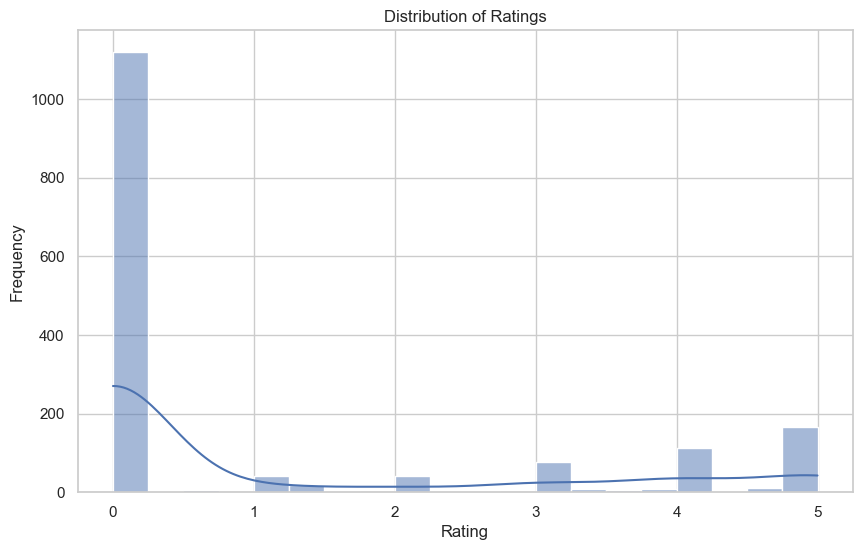

In [20]:
# Histogram for 'Rating'

# Set the style for the plots
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

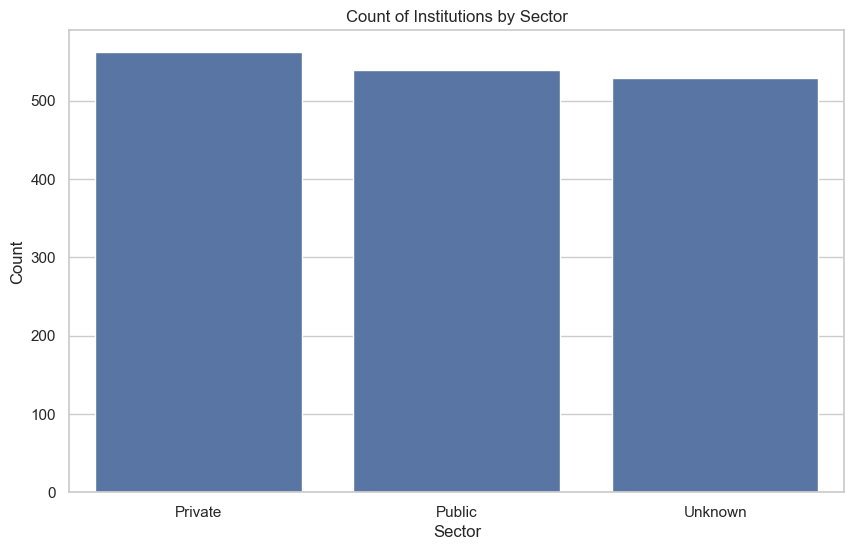

In [21]:


# Set the style for the plots
sns.set(style="whitegrid")

# Count plot for 'Sector'
plt.figure(figsize=(10, 6))
sns.countplot(x='Sector', data=df)
plt.title('Count of Institutions by Sector')
plt.xlabel('Sector')
plt.ylabel('Count')
plt.show()

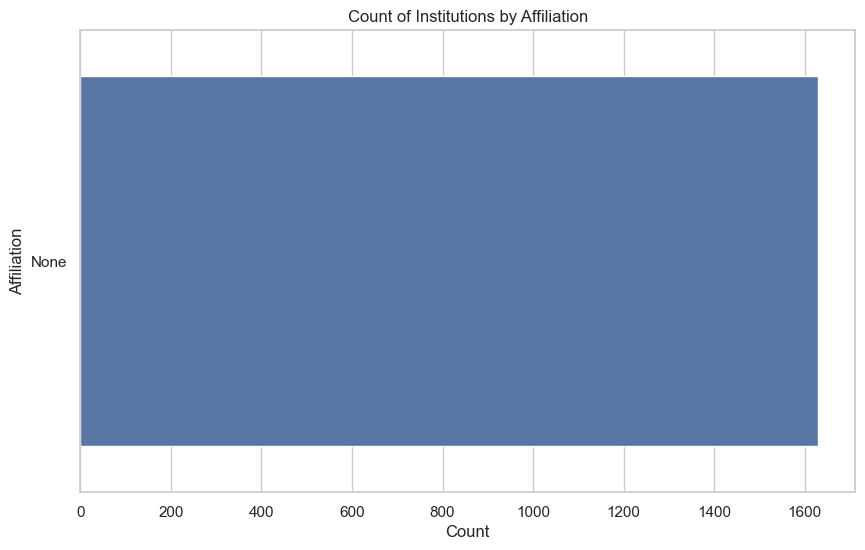

In [22]:
# Set the style for the plots
sns.set(style="whitegrid")

# Count plot for 'Affiliation'
plt.figure(figsize=(10, 6))
sns.countplot(y='Affiliation', data=df, order=df['Affiliation'].value_counts().index)
plt.title('Count of Institutions by Affiliation')
plt.xlabel('Count')
plt.ylabel('Affiliation')
plt.show()

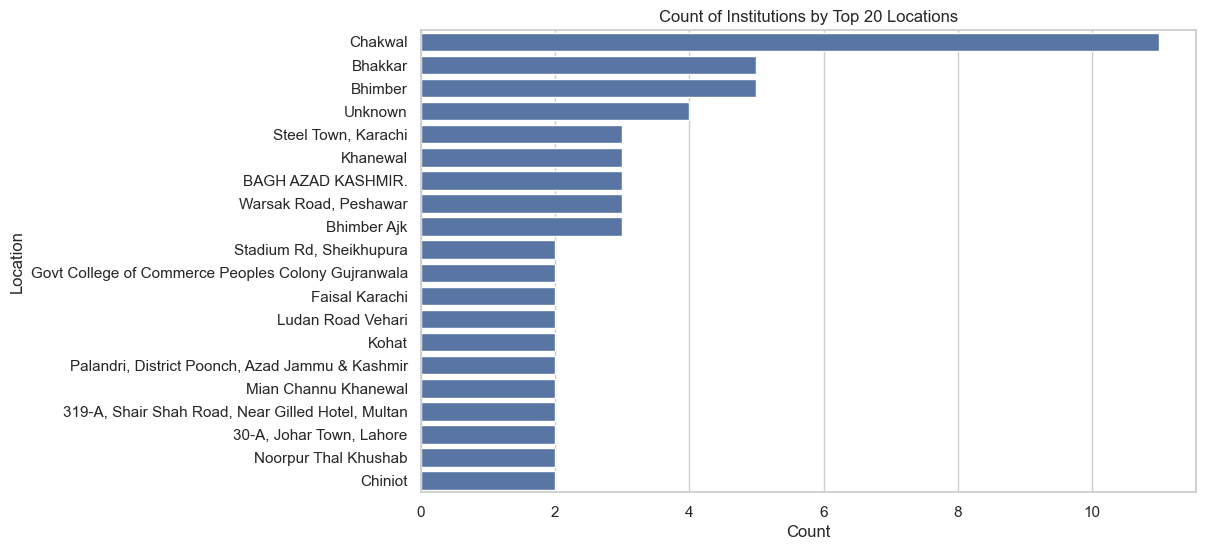

In [23]:
# Set the style for the plots
sns.set(style="whitegrid")


# Count plot for 'Location'
plt.figure(figsize=(10, 6))
sns.countplot(y='Location', data=df, order=df['Location'].value_counts().index[:20])  # Top 20 locations
plt.title('Count of Institutions by Top 20 Locations')
plt.xlabel('Count')
plt.ylabel('Location')
plt.show()

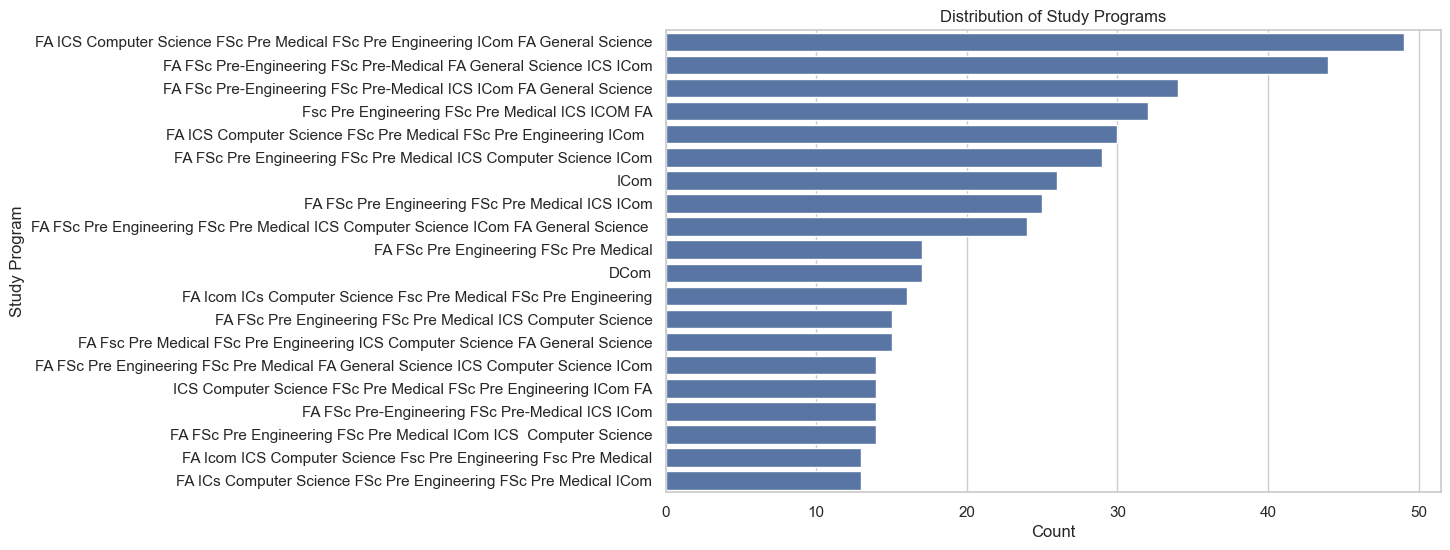

In [24]:
# Set the style for the plots
sns.set(style="whitegrid")


# Distribution of 'Study Program'
plt.figure(figsize=(10, 6))
sns.countplot(y='Study Program', data=df, order=df['Study Program'].value_counts().index[:20])  # Top 20 study programs
plt.title('Distribution of Study Programs')
plt.xlabel('Count')
plt.ylabel('Study Program')
plt.show()

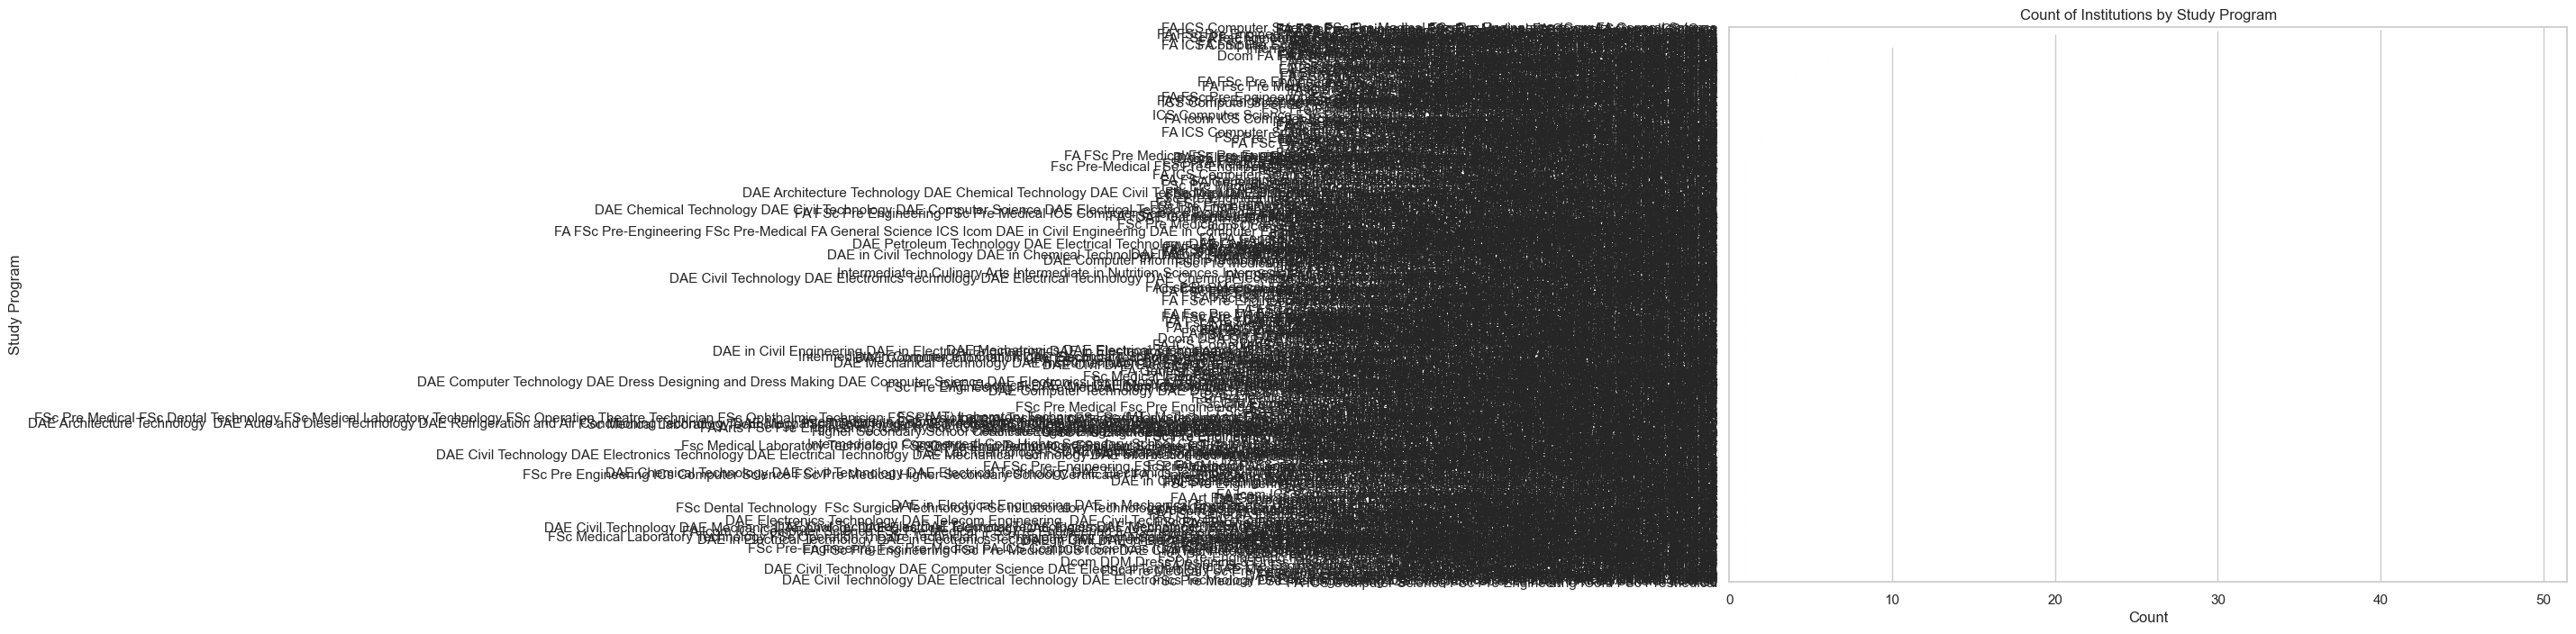

In [25]:
plt.figure(figsize=(12, 8))
sns.countplot(y='Study Program', data=df, order=df['Study Program'].value_counts().index)
plt.title('Count of Institutions by Study Program')
plt.xlabel('Count')
plt.ylabel('Study Program')
plt.show()

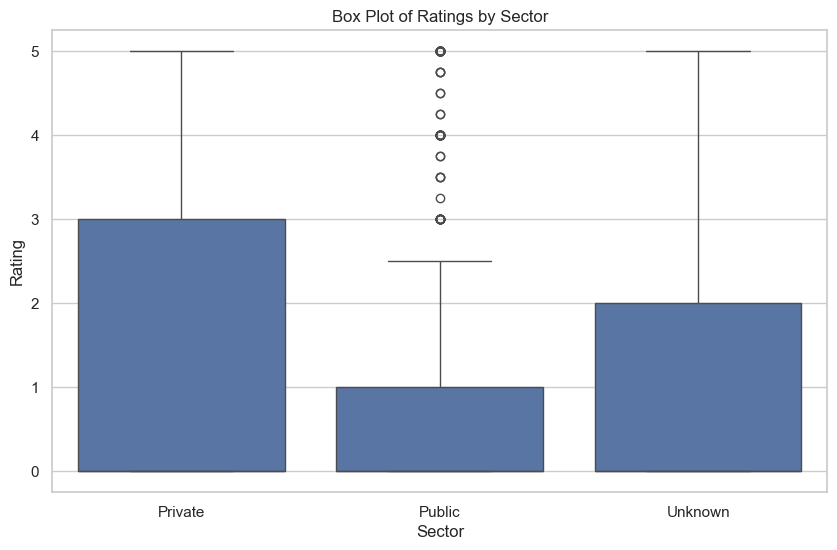

In [26]:
# Set the style for the plots
sns.set(style="whitegrid")


# Box plot for 'Rating' by 'Sector'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sector', y='Rating', data=df)
plt.title('Box Plot of Ratings by Sector')
plt.xlabel('Sector')
plt.ylabel('Rating')
plt.show()

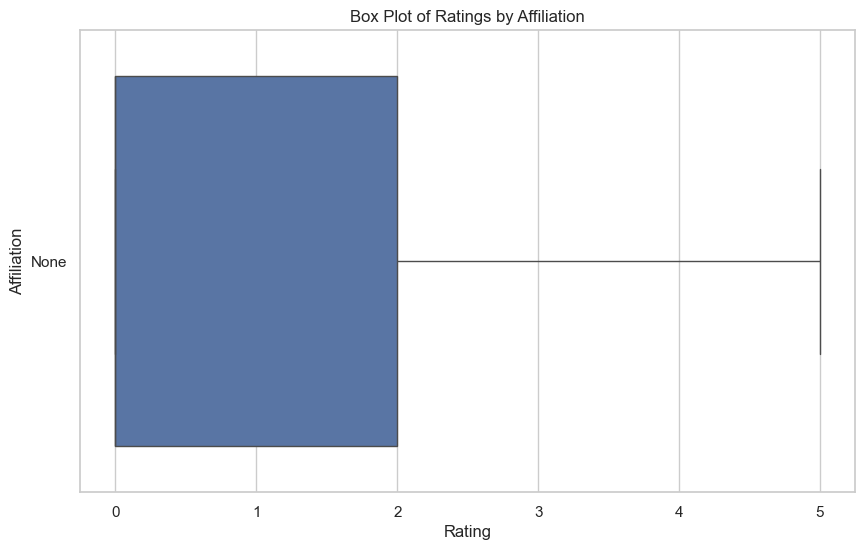

In [27]:
# Set the style for the plots
sns.set(style="whitegrid")


# Box plot for 'Rating' by 'Affiliation'
plt.figure(figsize=(10, 6))
sns.boxplot(y='Affiliation', x='Rating', data=df)
plt.title('Box Plot of Ratings by Affiliation')
plt.xlabel('Rating')
plt.ylabel('Affiliation')
plt.show()


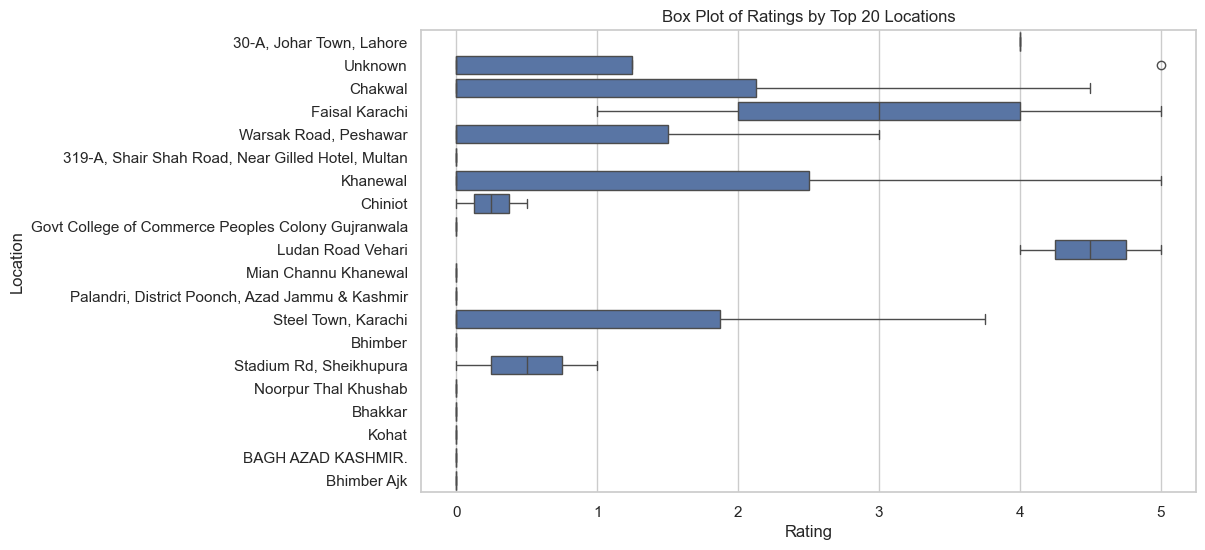

In [28]:
# Set the style for the plots
sns.set(style="whitegrid")

# Box plot for 'Rating' by 'Location' (Top 20 locations)
plt.figure(figsize=(10, 6))
sns.boxplot(y='Location', x='Rating', data=df[df['Location'].isin(df['Location'].value_counts().index[:20])])
plt.title('Box Plot of Ratings by Top 20 Locations')
plt.xlabel('Rating')
plt.ylabel('Location')
plt.show()

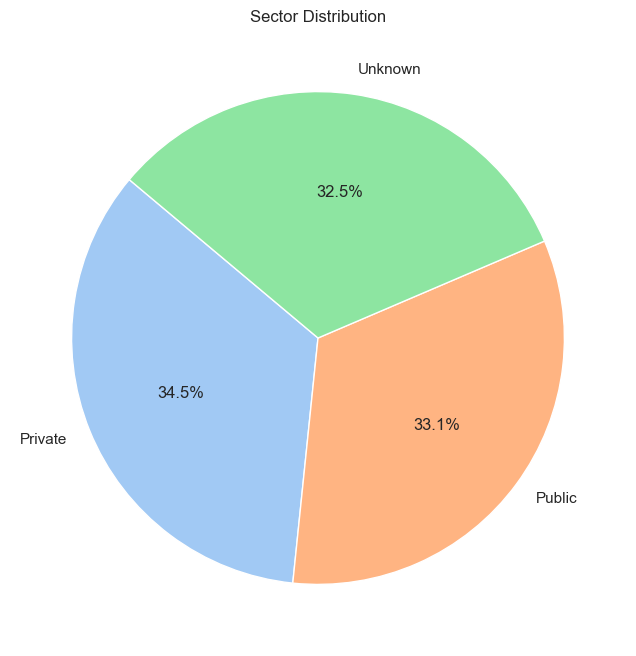

In [29]:
plt.figure(figsize=(8, 8))
df['Sector'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Sector Distribution')
plt.ylabel('')
plt.show()

## 6: Comprehensive Correlation Analysis
### 1. Numerical Correlation Analysis:
Select only the numeric columns and generate a correlation matrix heatmap.


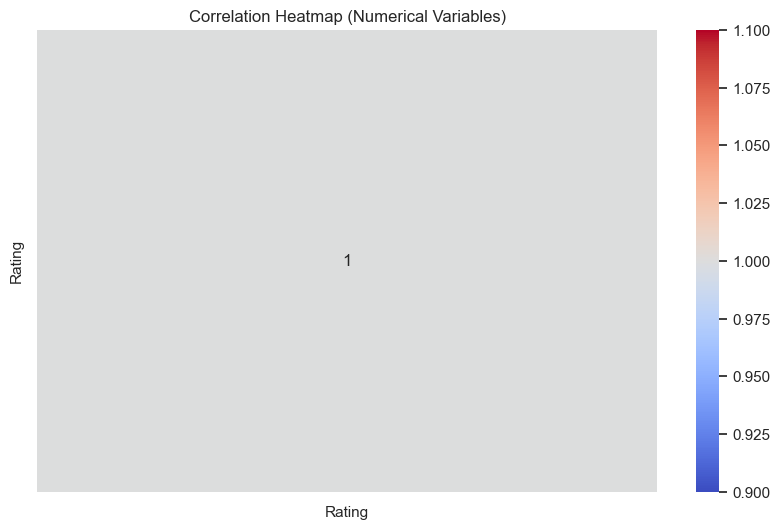

In [30]:
# Select only the numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=[np.number])

# Correlation heatmap for numeric columns
plt.figure(figsize=(10, 6))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Numerical Variables)')
plt.show()



### 2. Categorical Correlation Analysis:
To calculate Cramér's V, install the association_metrics package.


C:\Users\HP 840G4\AppData\Local\Temp\ipykernel_4196\2219606873.py:11: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2 / min(k-1, r-1))
C:\Users\HP 840G4\AppData\Local\Temp\ipykernel_4196\2219606873.py:11: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2 / min(k-1, r-1))
C:\Users\HP 840G4\AppData\Local\Temp\ipykernel_4196\2219606873.py:11: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2 / min(k-1, r-1))
C:\Users\HP 840G4\AppData\Local\Temp\ipykernel_4196\2219606873.py:11: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2 / min(k-1, r-1))
C:\Users\HP 840G4\AppData\Local\Temp\ipykernel_4196\2219606873.py:11: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2 / min(k-1, r-1))
C:\Users\HP 840G4\AppData\Local\Temp\ipykernel_4196\2219606873.py:11: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2 / min(k-1

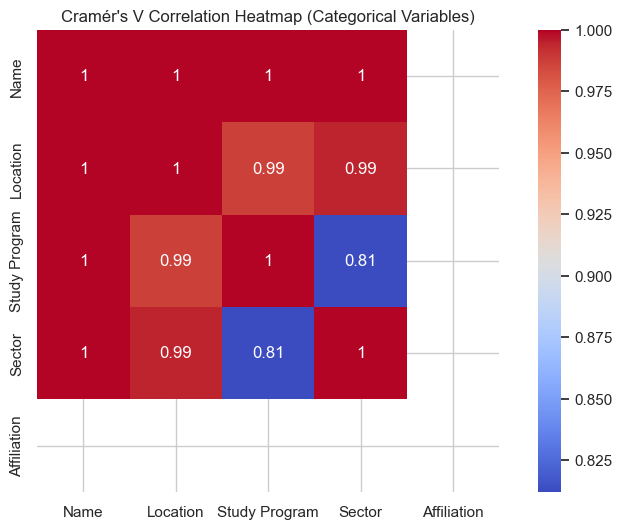

In [31]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k-1, r-1))

# Select only the categorical columns
categorical_df = df.select_dtypes(include=['object'])

# Calculate Cramér's V matrix
cramers_v_matrix = pd.DataFrame(index=categorical_df.columns, columns=categorical_df.columns)

for col1 in categorical_df.columns:
    for col2 in categorical_df.columns:
        cramers_v_matrix.loc[col1, col2] = cramers_v(categorical_df[col1], categorical_df[col2])

# Convert to float for visualization
cramers_v_matrix = cramers_v_matrix.astype(float)

# Plot heatmap for Cramér's V matrix
plt.figure(figsize=(10, 6))
sns.heatmap(cramers_v_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Cramér\'s V Correlation Heatmap (Categorical Variables)')
plt.show()


### Mixed Variable Analysis
Use point biserial correlation for numerical and binary categorical variables.

In [32]:
from scipy.stats import pointbiserialr

# Example: correlation between 'Rating' (numerical) and 'Sector' (binary categorical)
binary_sector = df['Sector'].apply(lambda x: 1 if x == 'Public' else 0)

# Point biserial correlation
corr, p_value = pointbiserialr(df['Rating'], binary_sector)

print(f'Point Biserial Correlation between Rating and Sector: {corr}, p-value: {p_value}')


Point Biserial Correlation between Rating and Sector: -0.05292646887072744, p-value: 0.03262464742265006


### Step 8: Comprehensive Box Plot Analysis
Box Plot for Each Numerical Variable by Each Categorical Variable

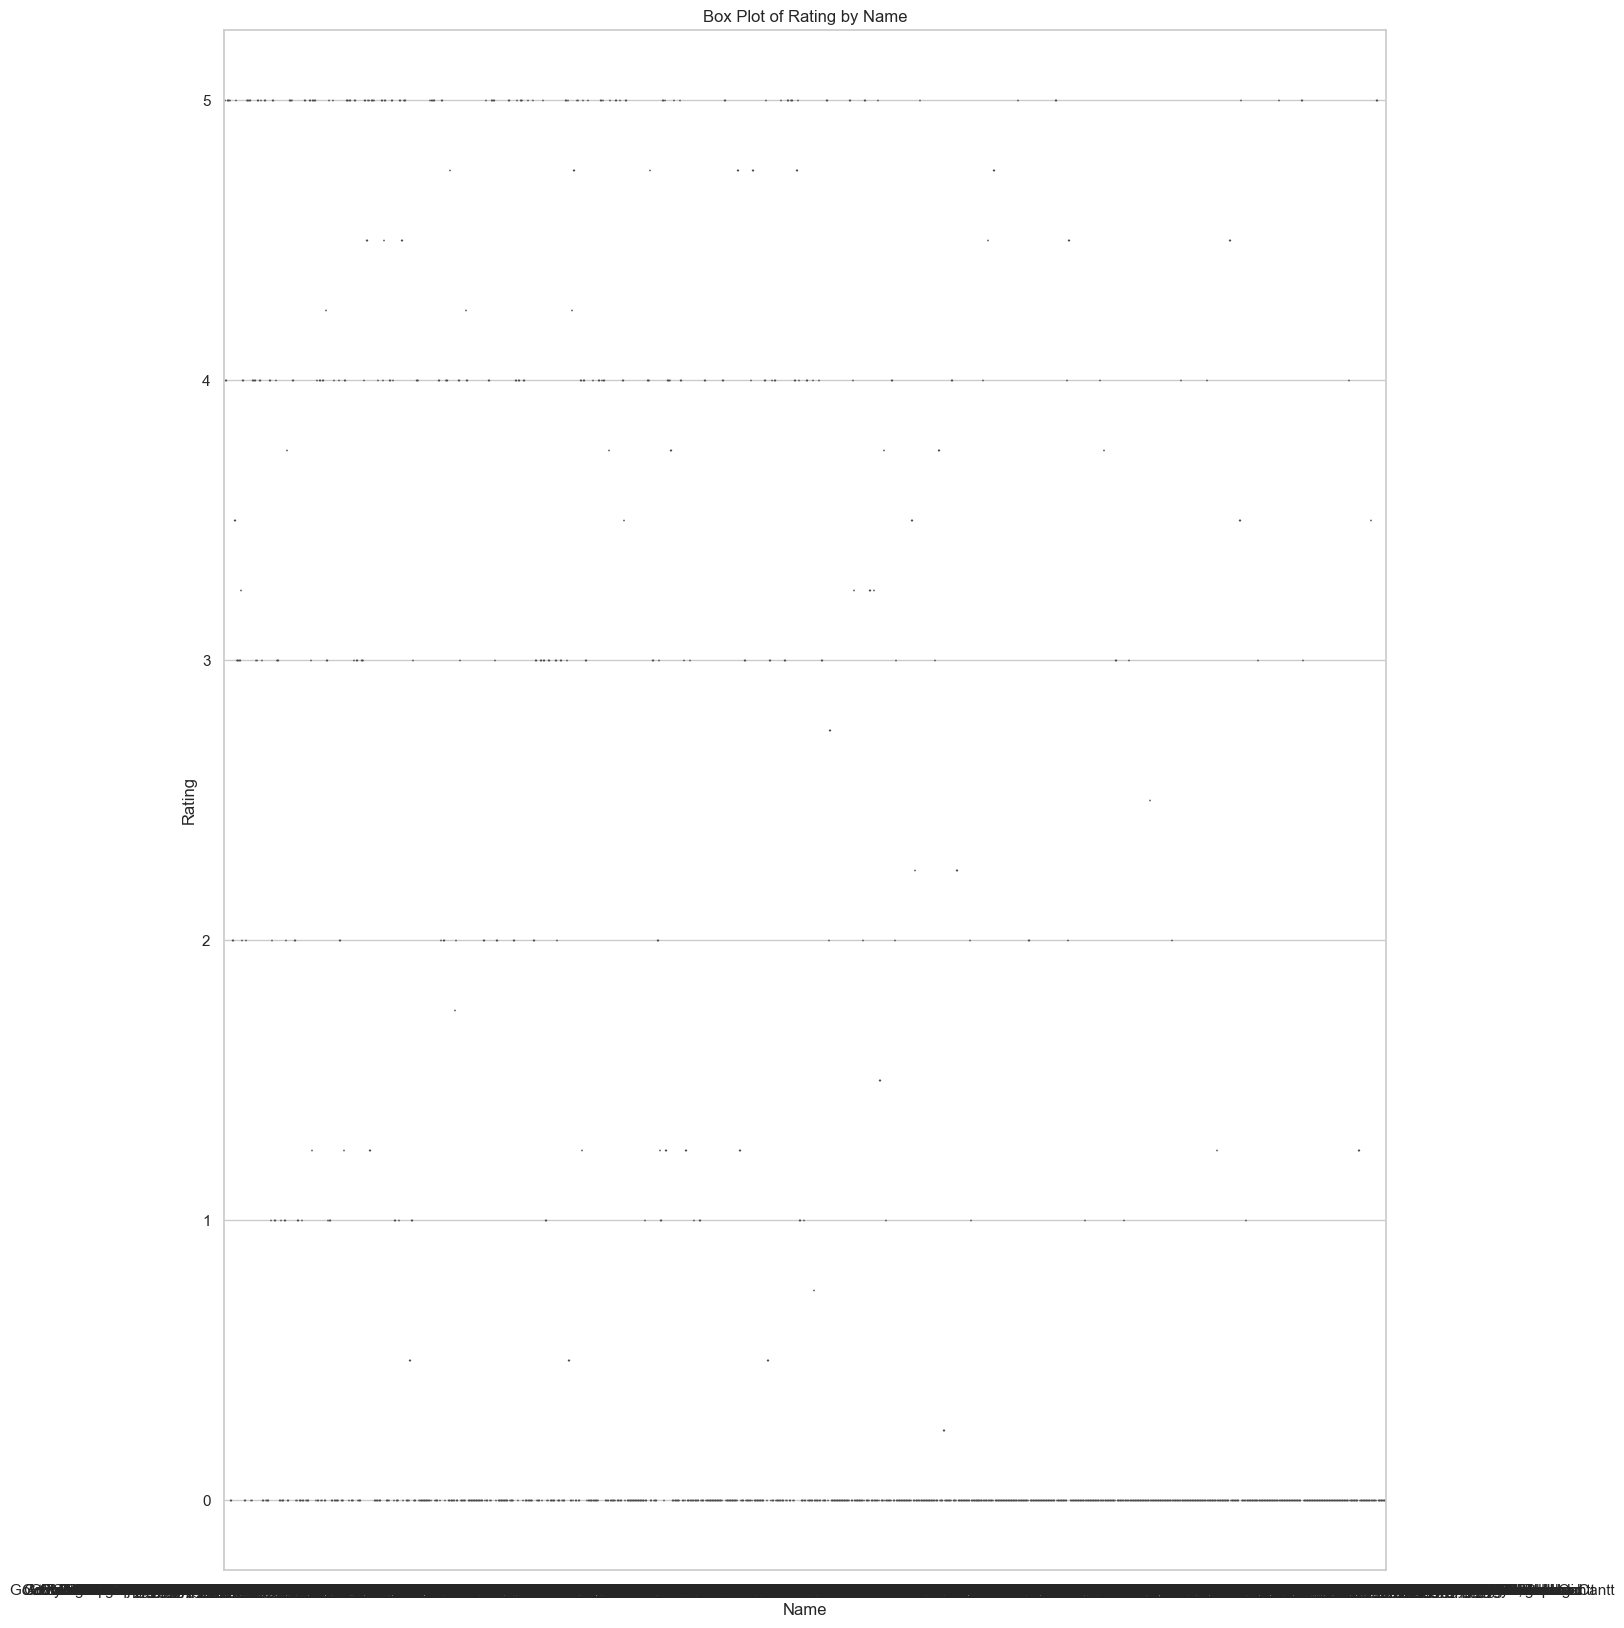

C:\Users\HP 840G4\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


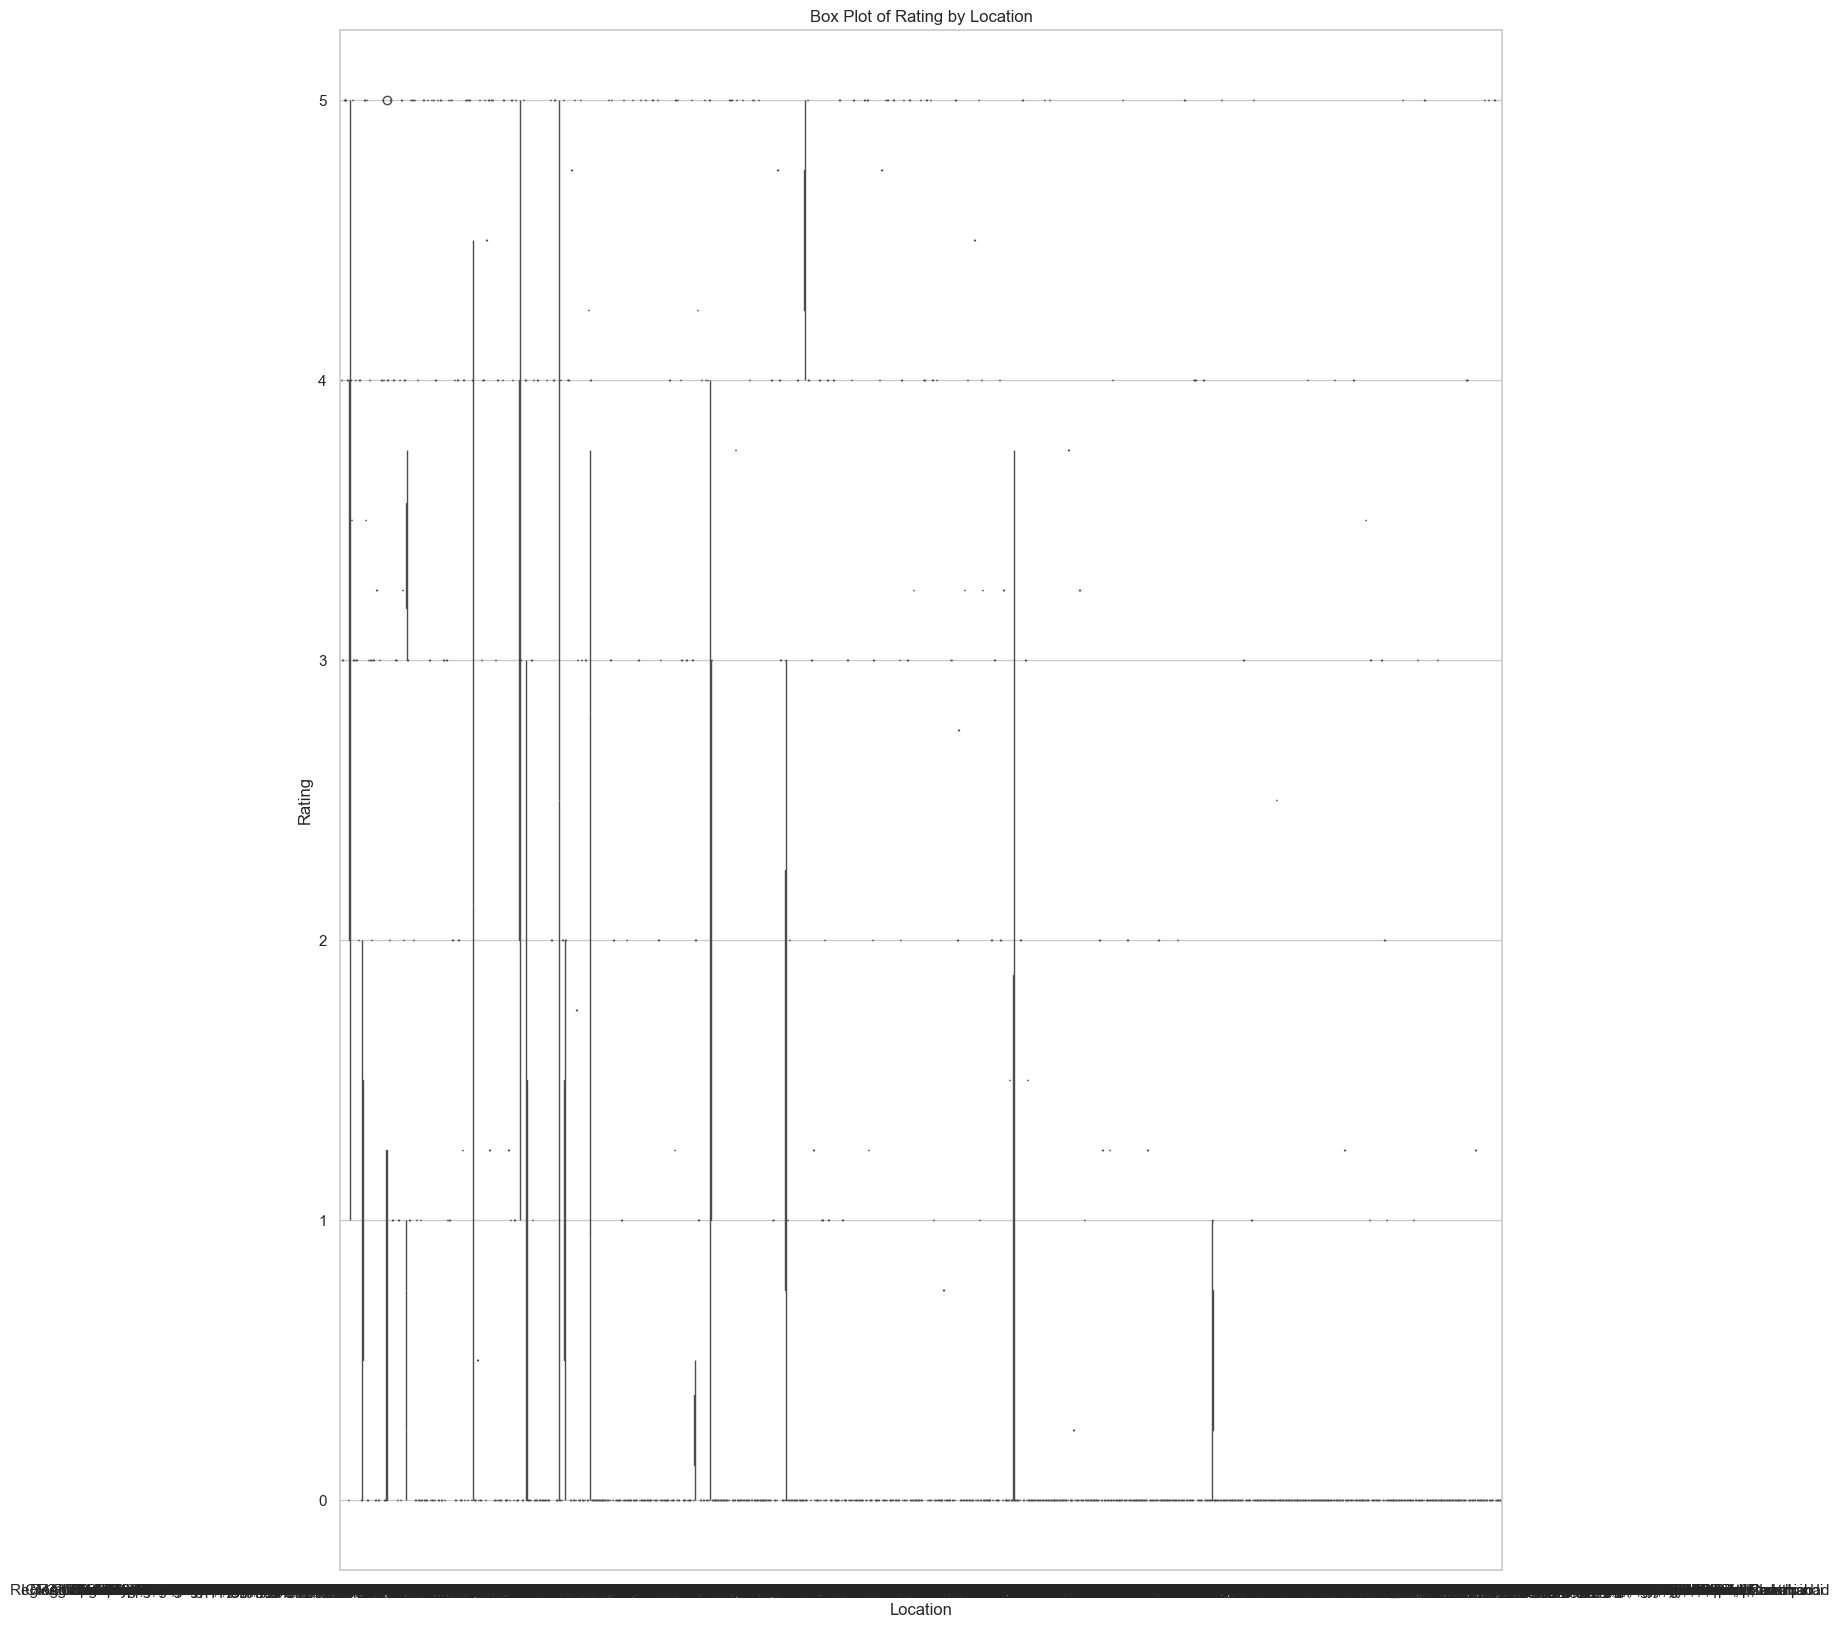

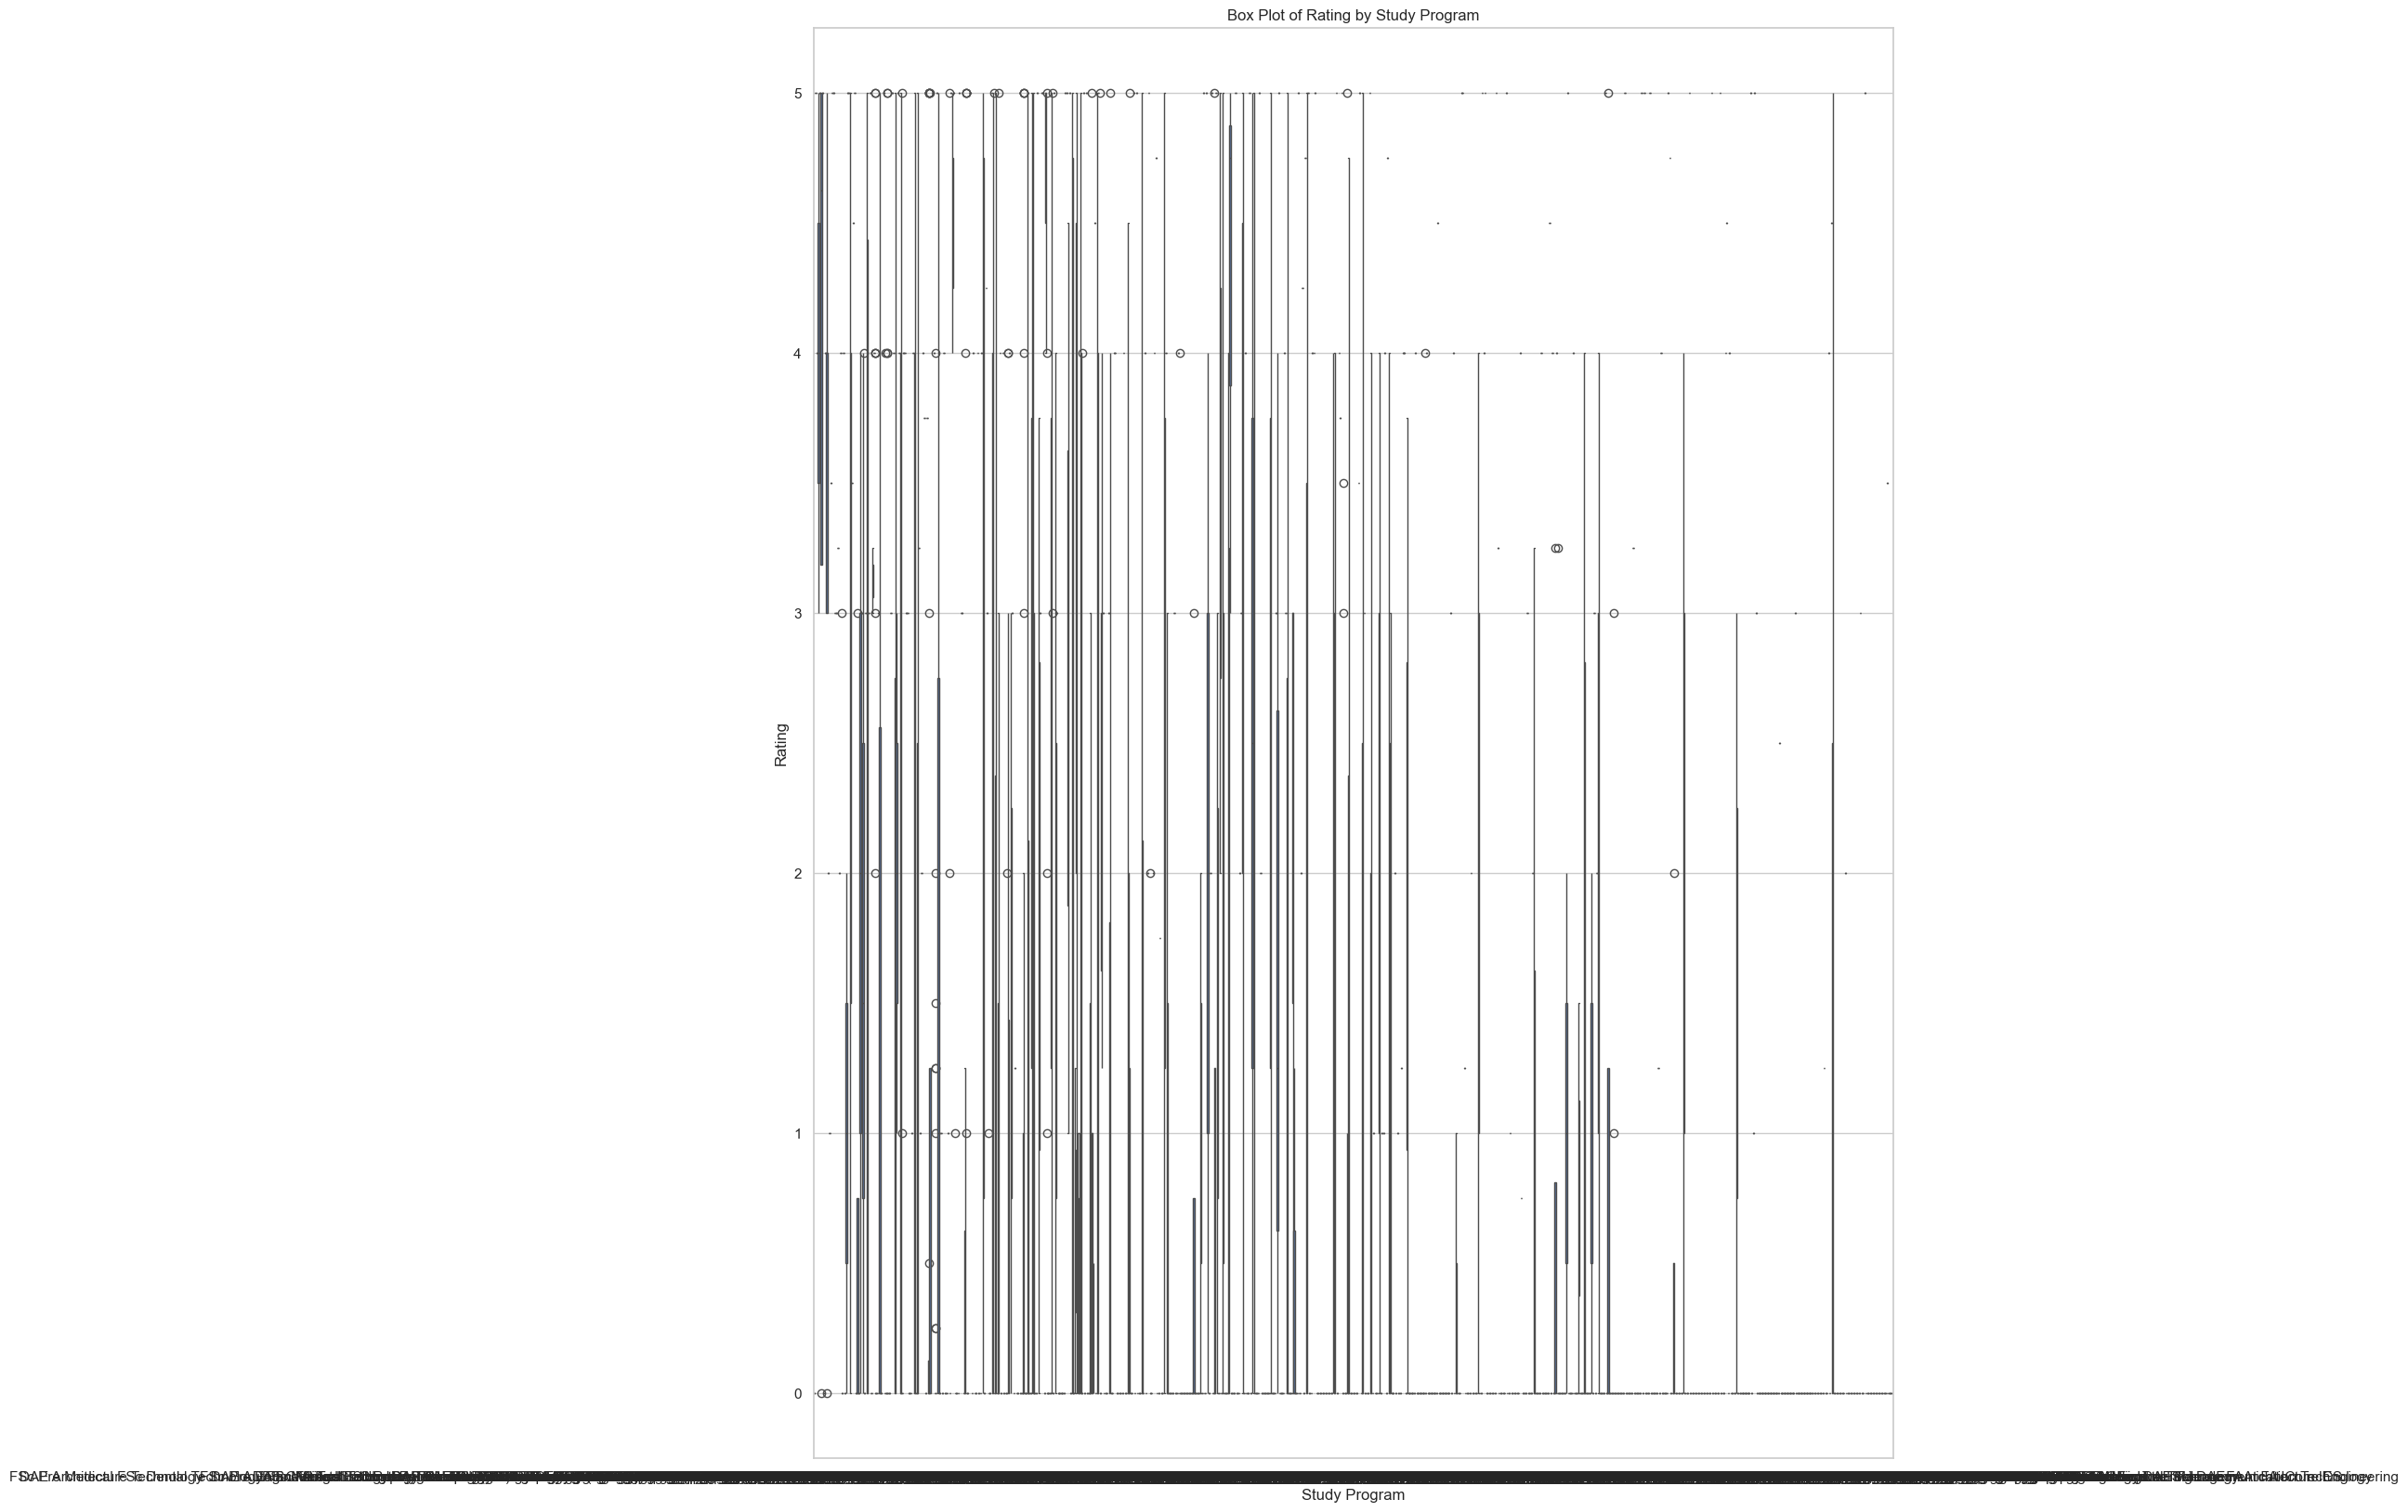

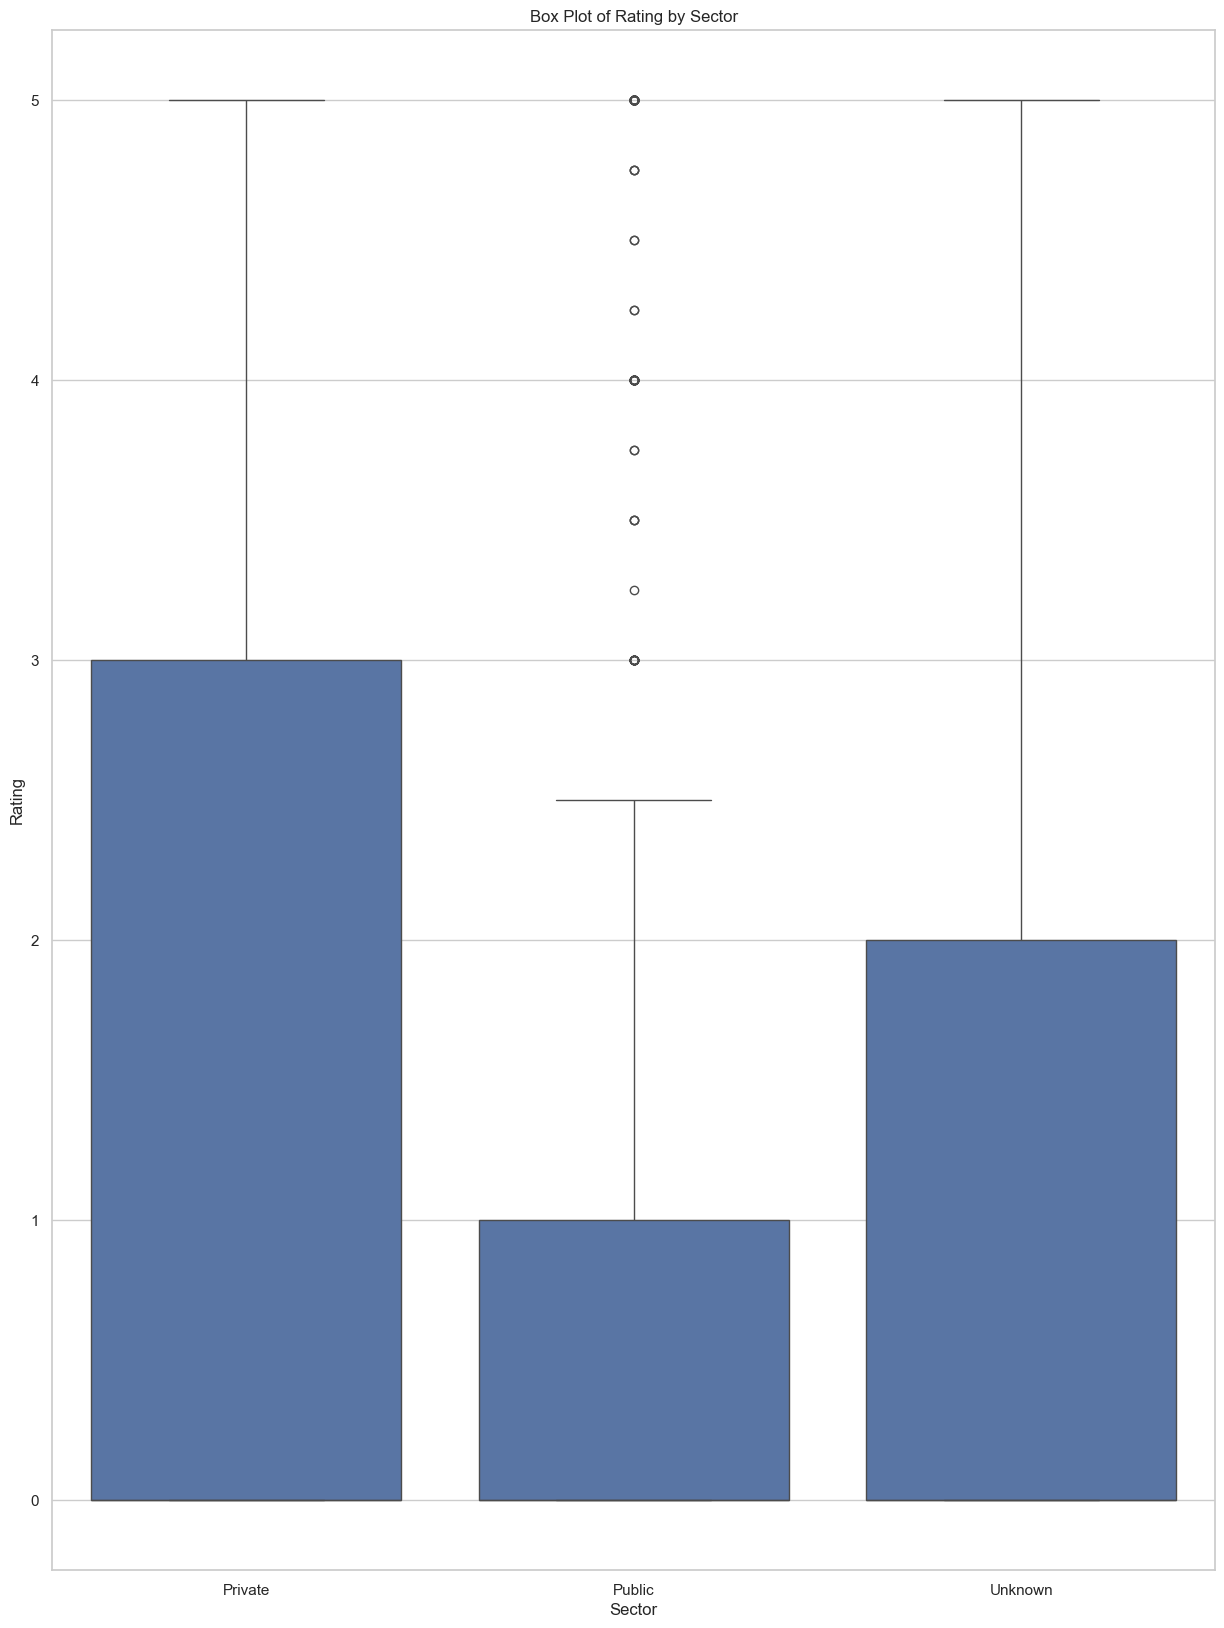

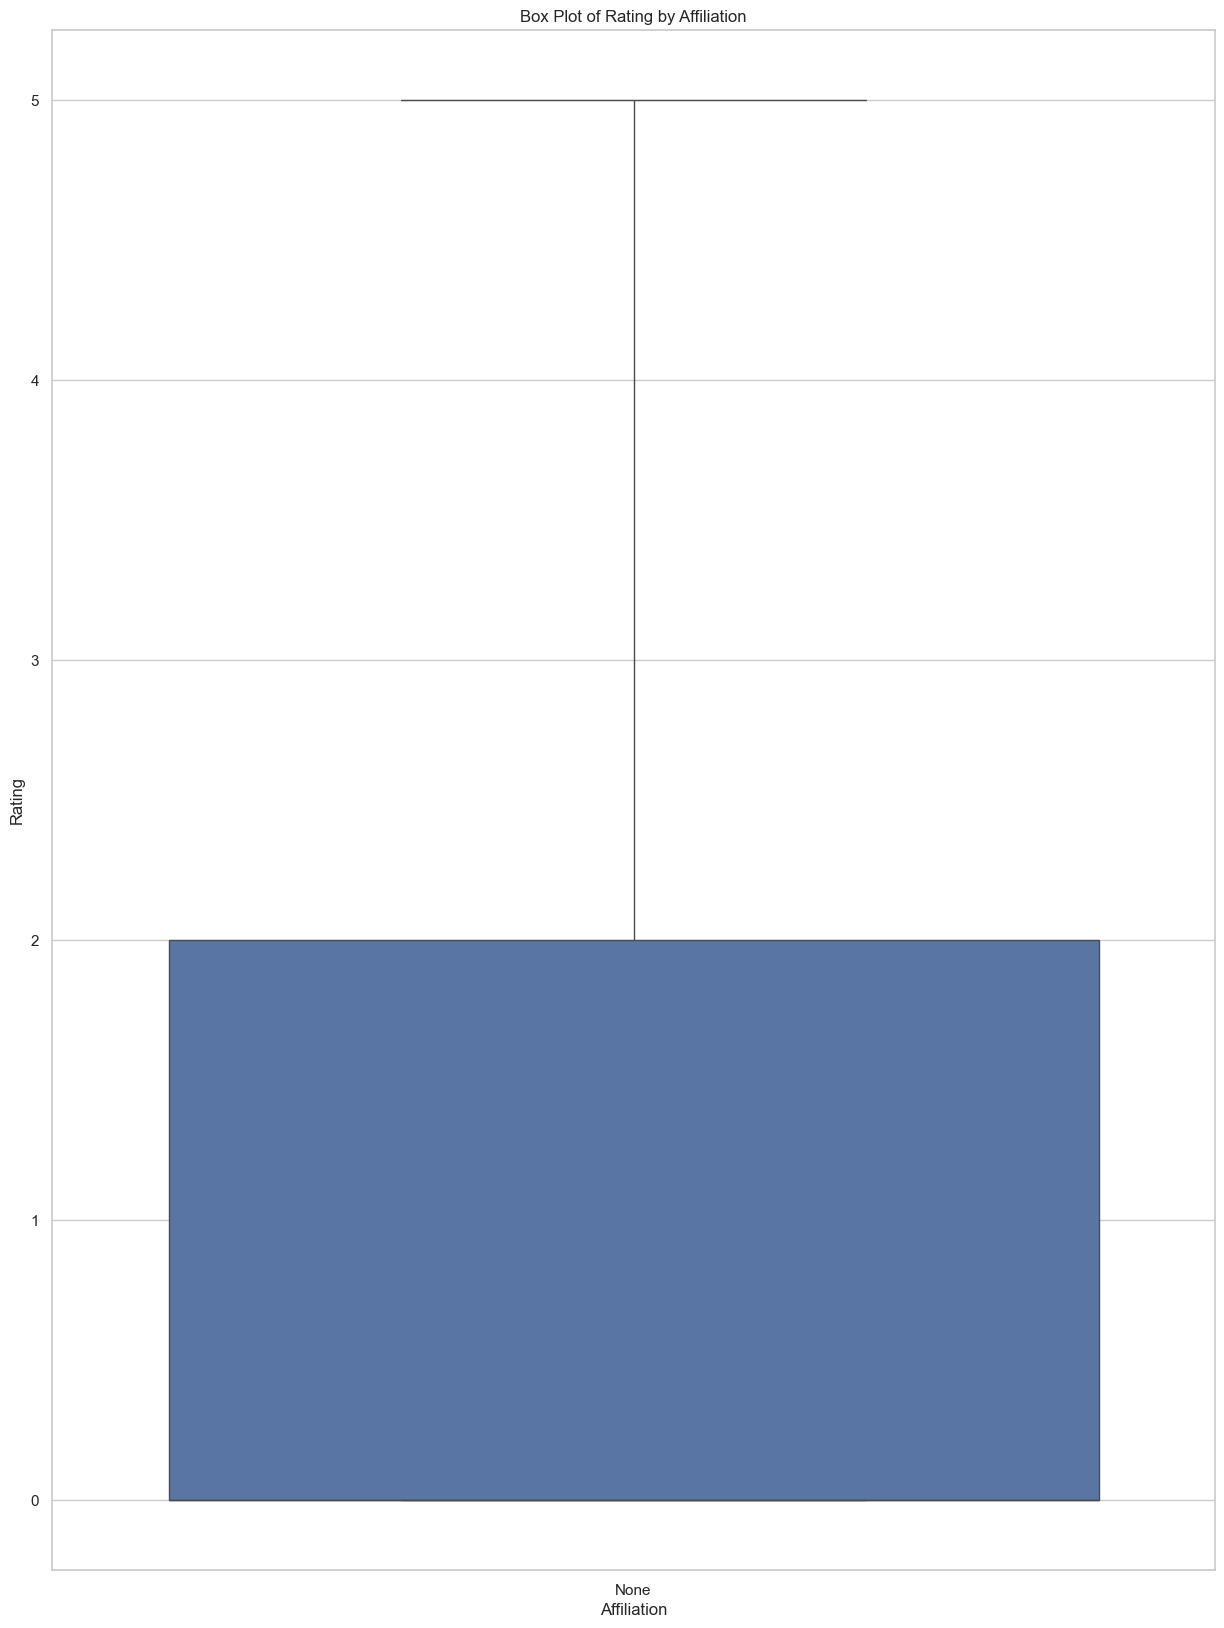

In [33]:
# List of numerical and categorical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Generate box plots for each numerical variable by each categorical variable
for num_col in numerical_columns:
    for cat_col in categorical_columns:
        plt.figure(figsize=(15, 20))
        sns.boxplot(x=cat_col, y=num_col, data=df)
        plt.title(f'Box Plot of {num_col} by {cat_col}')
        plt.xlabel(cat_col)
        plt.ylabel(num_col)
        plt.show()


In [34]:
# Save the updated DataFrame to a new CSV file
df.to_csv('data_cleaned.csv', index=False)
